# 📈 Predição da Progressão do Diabetes com KNN Regressor

## 🩺 Sobre o Dataset

Este projeto utiliza o **Diabetes Dataset** da biblioteca `scikit-learn`, contendo dados clínicos de pacientes, com o objetivo de prever a **progressão da doença** após um ano com base em exames médicos.

- **Variável-alvo (`target`)**:
  - Valor contínuo indicando a progressão da condição diabética.
  - Quanto maior o valor, mais grave a progressão estimada da doença.

---

## 🚀 Pipeline do Projeto

| Etapa | Descrição |
|-------|-----------|
| 📥 1. Carregamento | Importação do dataset diabetes (`load_diabetes`) |
| 🔍 2. Pré-processamento | Visualização geral, análise estatística, ausência de valores nulos |
| 📊 3. Seleção de Variáveis | Escolha das features mais correlacionadas com o `target` |
| ✂️ 4. Tratamento de Outliers | Remoção de valores extremos com Z-Score |
| ⚖️ 5. Normalização | Padronização dos dados com `StandardScaler` |
| 🔀 6. Split dos dados | Treino (80%) / Teste (20%) |
| 🔎 7. Validação Cruzada | `GridSearchCV` para otimização de `n_neighbors`, `weights` e `p` |
| 🤖 8. Treinamento | Modelo `KNeighborsRegressor` com os melhores hiperparâmetros |
| 📈 9. Avaliação | Cálculo de métricas e visualizações de resíduos |

---

## 📊 Régua Visual de Avaliação de Métricas de Regressão

| Métrica       | O que mede                                                  | Quando usar                                                  | Interpretação (Régua de Qualidade) |
|---------------|-------------------------------------------------------------|---------------------------------------------------------------|------------------------------------|
| **RMSE**      | Raiz do Erro Quadrático Médio                               | Quando penalizar **erros grandes** mais fortemente            | ✅ < 50 (baixo erro)<br>🟡 50–70 (médio)<br>🔴 > 70 (erro alto) |
| **MAE**       | Erro absoluto médio                                          | Para saber o erro **médio em unidades reais**                 | ✅ < 45 (baixo erro)<br>🟡 45–65 (ok)<br>🔴 > 65 (alto erro) |
| **R² (R-quadrado)** | Quanto da variância o modelo explica                       | Avaliação geral da **qualidade do ajuste**                    | ✅ > 0.80 (excelente)<br>🟡 0.60–0.80 (ok)<br>🔴 < 0.60 (fraco) |
| **R² CV**     | Média do R² via validação cruzada                           | Mede **generalização** para novos dados                       | Ideal se próximo do R² de teste    |

---

## 📘 Como Ler os Resultados

- **RMSE** mostra o erro médio com maior penalização para erros extremos.
- **MAE** mostra o erro médio real sem penalização elevada.
- **R² > 0.8** → o modelo explica bem a variabilidade dos dados.
- **Distribuição dos resíduos simétrica e centrada no zero** indica modelo balanceado.
- **Dispersão dos resíduos ao redor de 0** → comportamento esperado.
- Se os resíduos crescem ou decrescem sistematicamente → pode haver **viés** no modelo.

---

## 📷 Visualizações Geradas

- 🧊 **Boxplot dos Resíduos**: identifica outliers e assimetrias.
- 🎯 **Resíduo vs Valor Predito**: detecta heterocedasticidade e viés.
- 🧩 **Resíduo vs Valor Real**: analisa tendência de sub ou superestimação.
- 📐 **Q-Q Plot dos Resíduos**: verifica normalidade dos erros.
- 🔥 **Matriz de Correlação**: para seleção de variáveis explicativas.

---

## 📈 Resultados Obtidos (exemplo)

| Métrica         | Valor |
|------------------|--------|
| Melhor K         | 9     |
| Métrica `p`      | 1 (Manhattan) |
| Weights          | uniform |
| RMSE (Treino)    | ~52.69 |
| RMSE (Teste)     | ~53.92 |
| MAE (Teste)      | ~42.60 |
| R² (Teste)       | ~0.47  |
| R² CV (Train)    | ~0.44  |

🟡 *Desempenho intermediário — bom ponto de partida, mas ainda há espaço para melhorias testando outros modelos.*

---

## 🛠️ Requisitos

```bash
pip install numpy pandas scikit-learn seaborn matplotlib scipy statsmodels



📌 VISÃO GERAL DO DATASET:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442

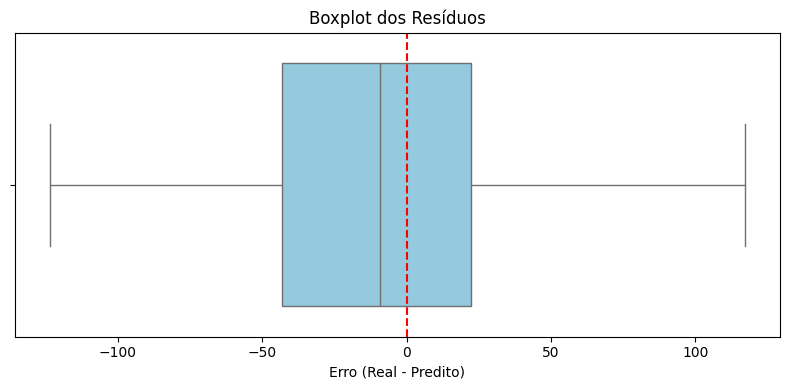

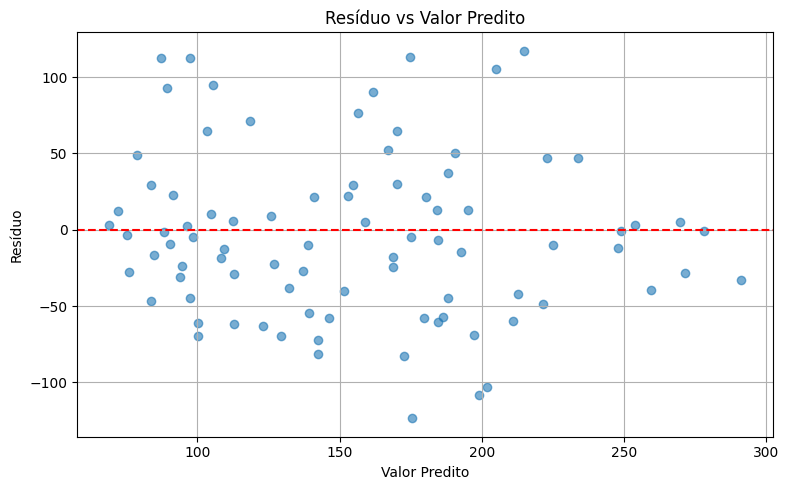

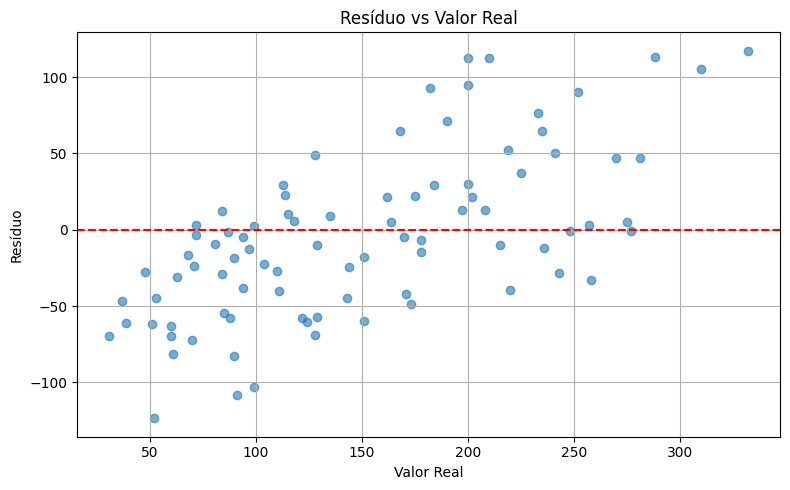

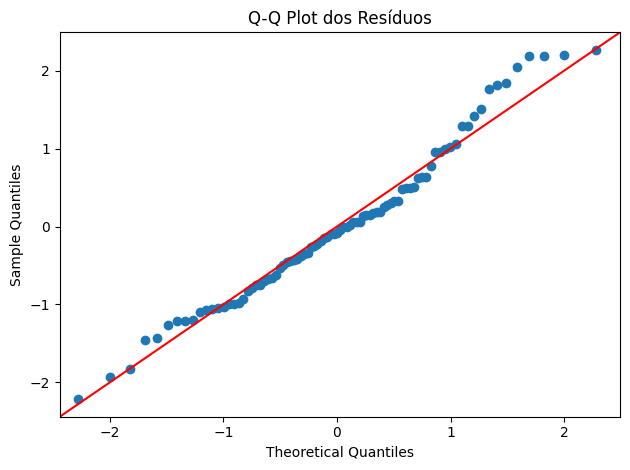

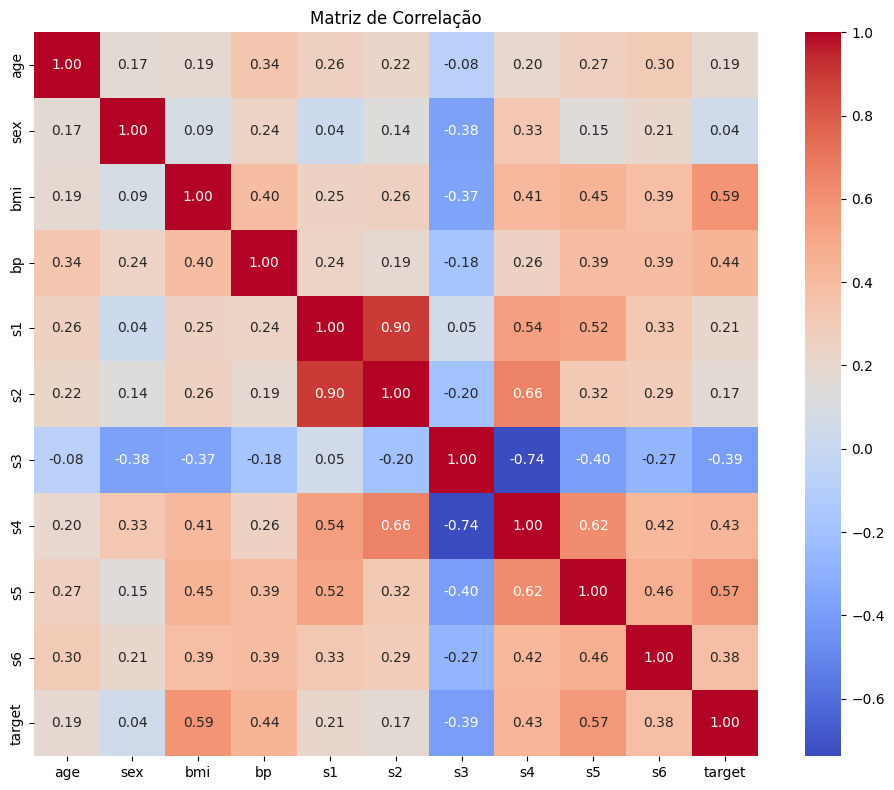

In [8]:
# 📦 Importação das Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# 🔢 Carregando o dataset
dados = load_diabetes(as_frame=True)
df = dados.frame.copy()

# 📦 Pré-processamento
print("\n📌 VISÃO GERAL DO DATASET:\n", df.head())
print("\n📌 INFO:\n", df.info())
print("\n📌 DESCRIÇÃO ESTATÍSTICA:\n", df.describe())
print("\n📌 VALORES AUSENTES:\n", df.isnull().sum())

# 🔍 Seleção de variáveis mais correlacionadas
df_corr = df.corr()["target"].abs().sort_values(ascending=False)
variaveis_selecionadas = df_corr[df_corr > 0.3].index.drop("target")
X = df[variaveis_selecionadas]
y = df["target"]

print("\n📌 VARIÁVEIS SELECIONADAS:", list(variaveis_selecionadas))

# ✂️ Remoção de outliers com Z-score
z_scores = np.abs(stats.zscore(X))
mask = (z_scores < 3).all(axis=1)
X, y = X[mask], y[mask]

# ⚖️ Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔧 Hiperparâmetros para GridSearch
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# ⚙️ Modelo KNN Regressor + GridSearch
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)
melhor_modelo = grid.best_estimator_

# 🔮 Previsões
y_pred_train = melhor_modelo.predict(X_train)
y_pred_test = melhor_modelo.predict(X_test)

# 📏 Avaliação
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
cv_r2 = cross_val_score(melhor_modelo, X_train, y_train, cv=5, scoring="r2").mean()

# 📊 Métricas
print(f"\n🏆 Melhor combinação de parâmetros: {grid.best_params_}")
print(f"✅ RMSE (Treino): {rmse_train:.2f}")
print(f"✅ RMSE (Teste): {rmse_test:.2f}")
print(f"✅ MAE  (Teste): {mae_test:.2f}")
print(f"✅ R²   (Teste): {r2_test:.2f}")
print(f"📉 R² Médio (CV Treino): {cv_r2:.2f}")

# 📊 Boxplot dos Resíduos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.boxplot(x=residuos, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Boxplot dos Resíduos")
plt.xlabel("Erro (Real - Predito)")
plt.tight_layout()
plt.show()

# 📈 Resíduo vs Valor Predito
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduo vs Valor Predito")
plt.xlabel("Valor Predito")
plt.ylabel("Resíduo")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Resíduo vs Valor Real
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduo vs Valor Real")
plt.xlabel("Valor Real")
plt.ylabel("Resíduo")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Q-Q Plot dos Resíduos
import scipy.stats as stats
import statsmodels.api as sm
sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q Plot dos Resíduos")
plt.tight_layout()
plt.show()

# 📊 Matriz de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()